In [1]:
%load_ext autoreload
%autoreload 2
import torch
import sys
sys.path.append('...')
from dataio import CustomDataset, custom_transform
import matplotlib.pyplot as plt


## Loading the data

In [2]:
train_data, val_data, test_data = [
    CustomDataset(
        path = "chest_xray",
        split = split,
        transform = None,

    )
    for split in ["train", "val", "test"]
]

print(f"Train size: {len(train_data)}")
print(f"Val size: {len(val_data)}")
print(f"Test size: {len(test_data)}")

Train size: 5216
Val size: 16
Test size: 624


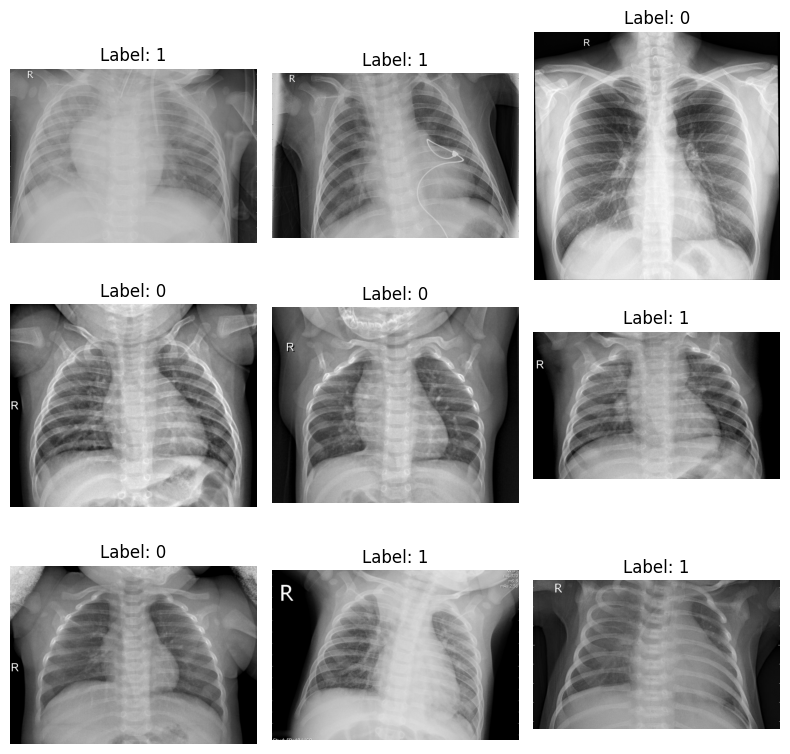

In [3]:
## Some visualisation of the first 9 training data points
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
# random indices for visualization
torch.manual_seed(42)
idx = torch.randperm(len(train_data))[:9]
for i in range(3):
    for j in range(3):
        img, label = train_data[idx[i * 3 + j]]
        axes[i, j].imshow(img.permute(1, 2, 0), cmap='gray')
        axes[i, j].set_title(f"Label: {label}")
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

In [4]:
sizes, labels = [], []
for img, label in train_data:
    sizes.append(img.size())
    labels.append(label)

## Classes are imbalances, motivating the use of weights in the cost function

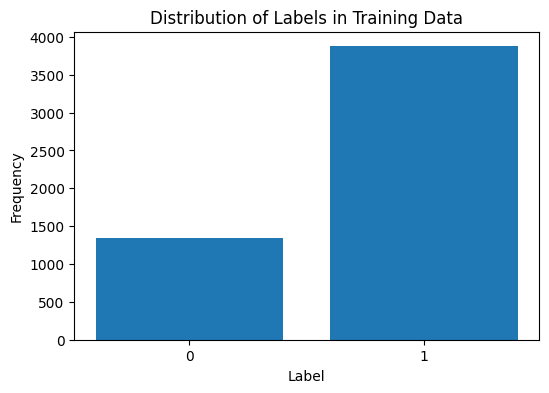

In [16]:
# Histogram of the labels
plt.figure(figsize=(6, 4))
plt.hist(labels, bins=range(3), align='left', rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels in Training Data')
plt.show()

## Setting all the images to 128*128 in torch tensors with a custom transformation

In [10]:
for set in [train_data, val_data, test_data]:
    set.transform = custom_transform(128)

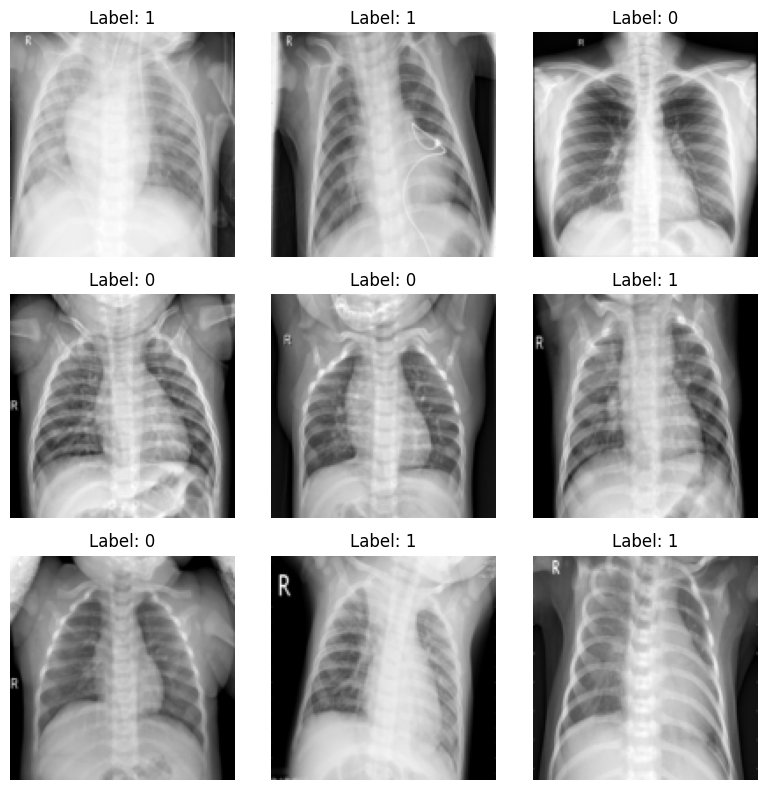

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
# random indices for visualization
torch.manual_seed(42)
idx = torch.randperm(len(train_data))[:9]
for i in range(3):
    for j in range(3):
        img, label = train_data[idx[i * 3 + j]]
        axes[i, j].imshow(img.permute(1, 2, 0), cmap='gray')
        axes[i, j].set_title(f"Label: {label}")
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()